In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
#dataset
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [4]:
train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
for cols in train_df.columns:
    print(cols, train_df[cols].nunique())


Item_Identifier 1559
Item_Weight 415
Item_Fat_Content 5
Item_Visibility 7880
Item_Type 16
Item_MRP 5938
Outlet_Identifier 10
Outlet_Establishment_Year 9
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4
Item_Outlet_Sales 3493


In [7]:
train_df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train_df['Item_Identifier']


0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

[Text(0, 0.5, 'Item_Weight'),
 Text(0, 1.5, 'Item_Visibility'),
 Text(0, 2.5, 'Item_MRP'),
 Text(0, 3.5, 'Item_Outlet_Sales')]

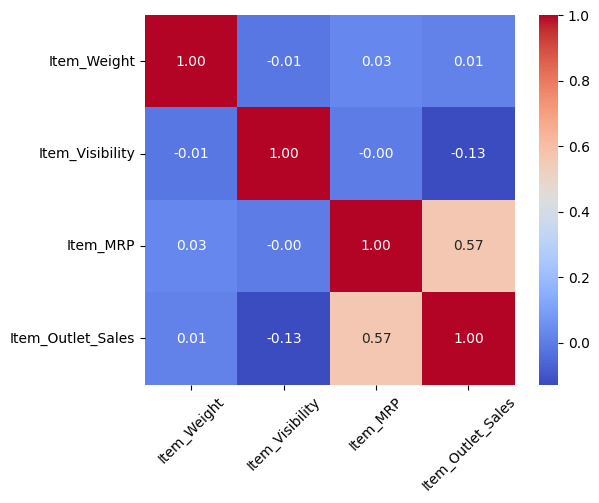

In [9]:
corr = train_df[['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales']].corr(method='pearson')
g = sns.heatmap(corr, cmap="coolwarm", vmax=1, square=True, annot=True, fmt='.2f')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_yticklabels(g.get_yticklabels(), rotation=0)

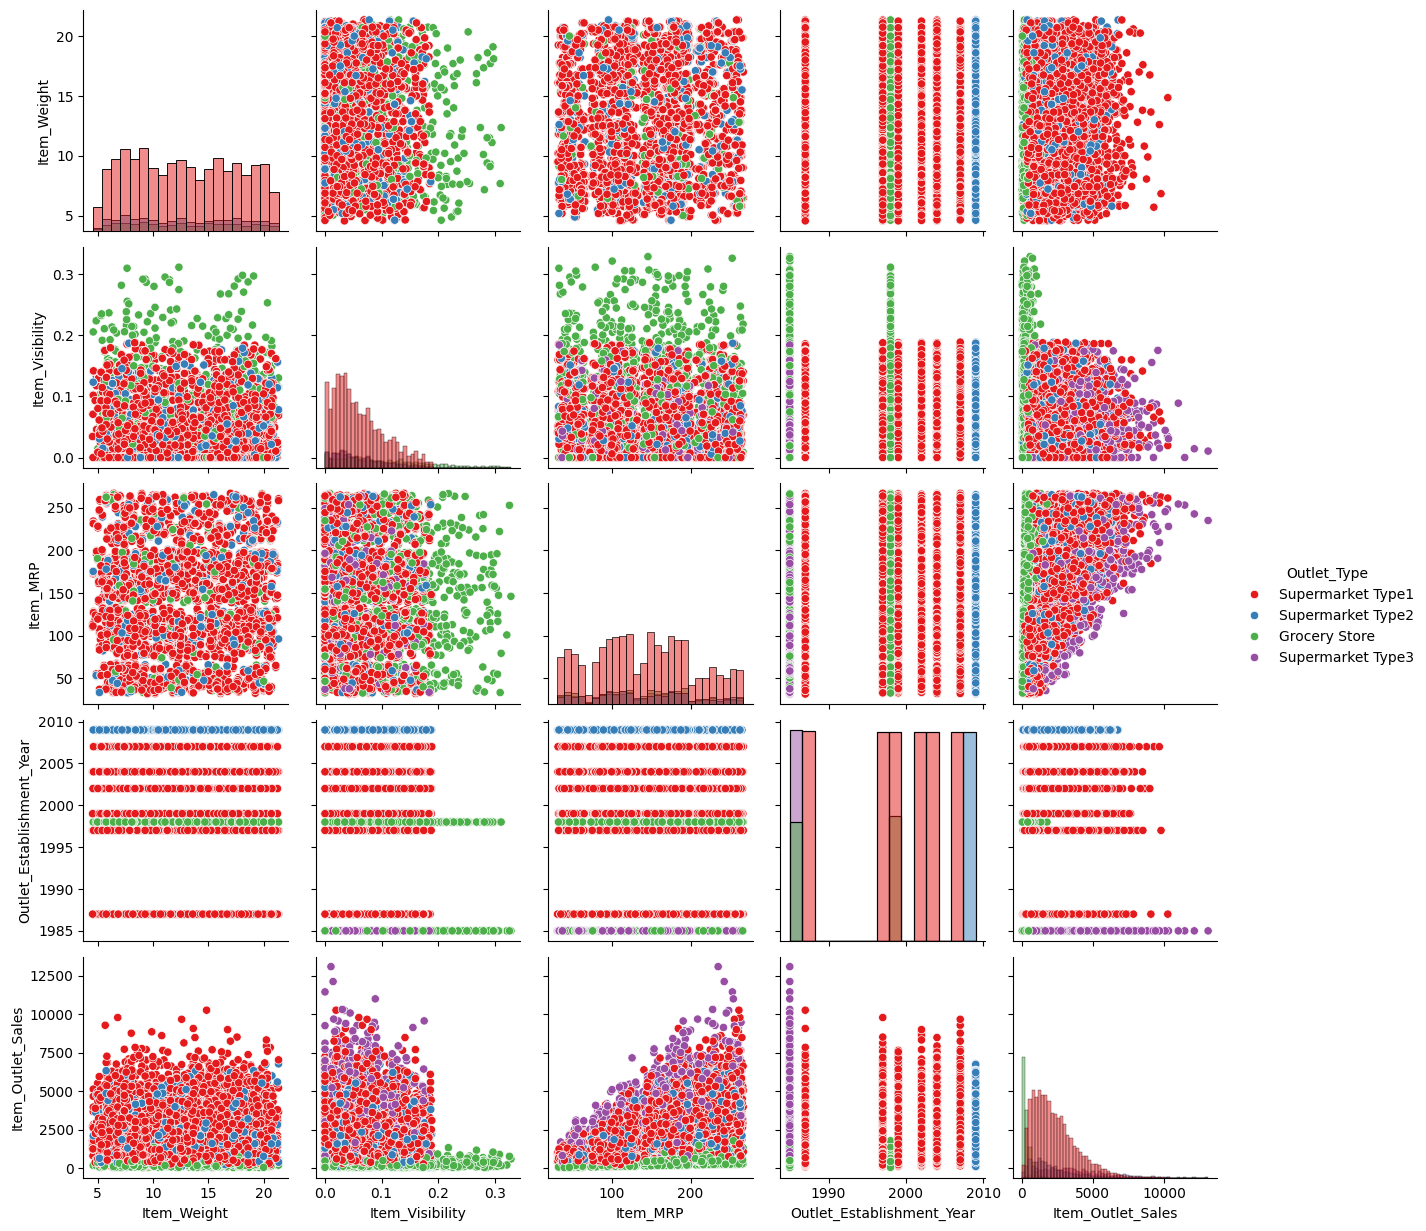

In [16]:
sns.pairplot(data=train_df, hue='Outlet_Type', diag_kind='hist', palette="Set1")


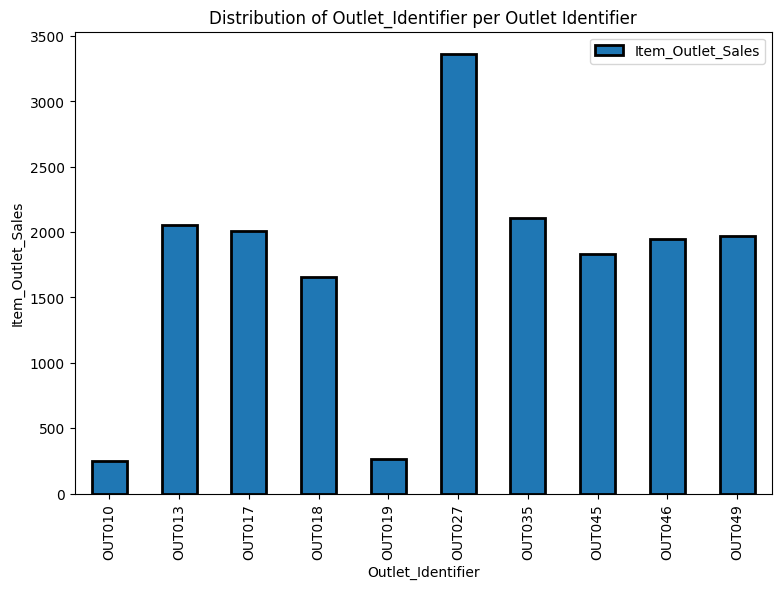

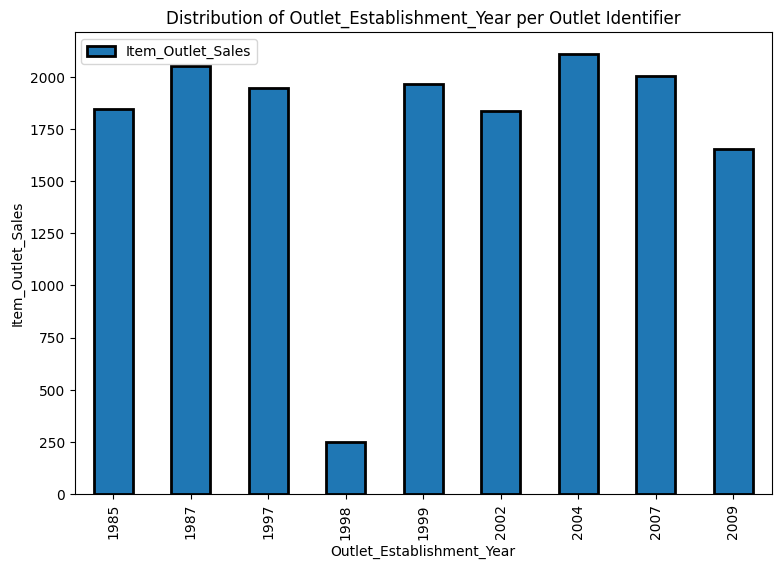

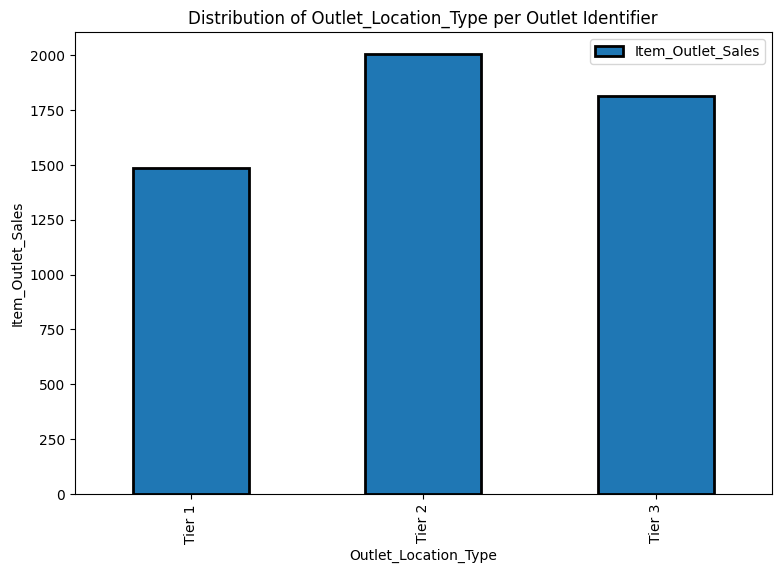

In [17]:
relations('Outlet_Identifier')

train_df.pivot_table(values='Outlet_Type', columns='Outlet_Identifier', aggfunc=lambda x:x.mode())

train_df.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

relations('Outlet_Establishment_Year')

relations('Outlet_Location_Type')

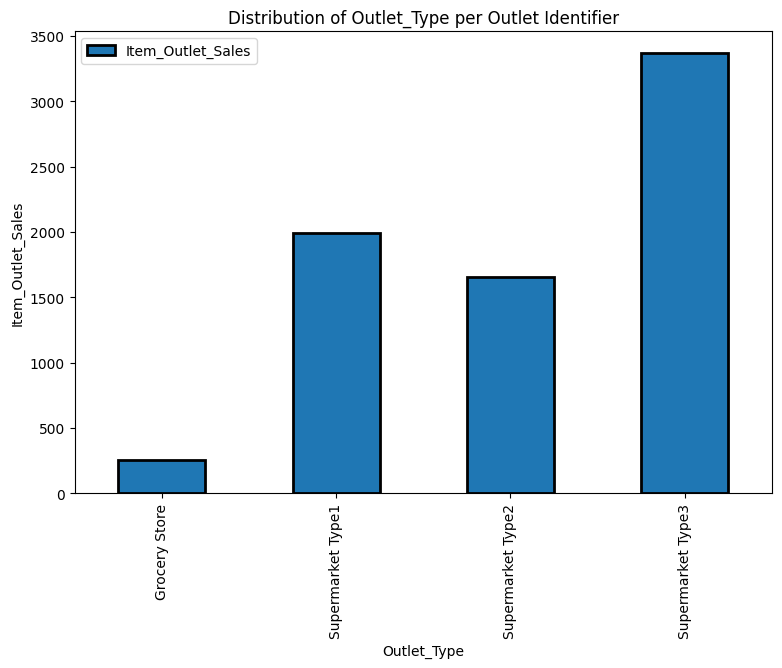

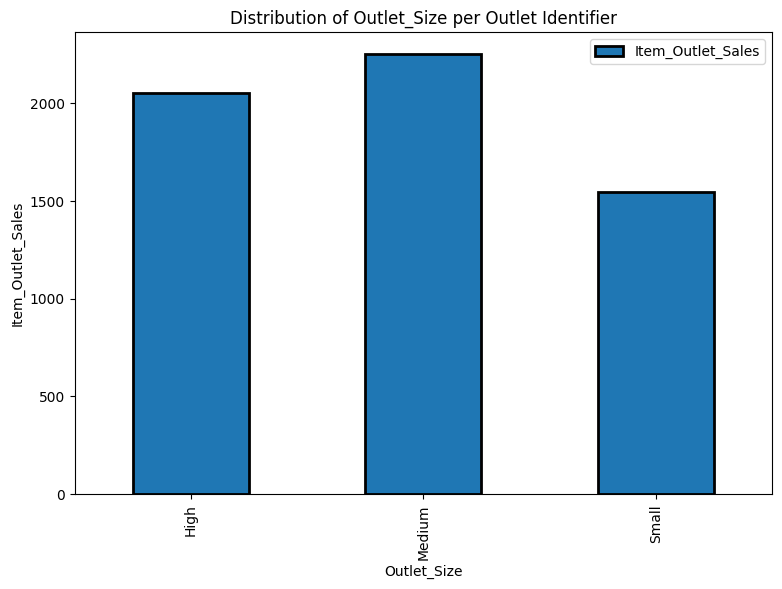

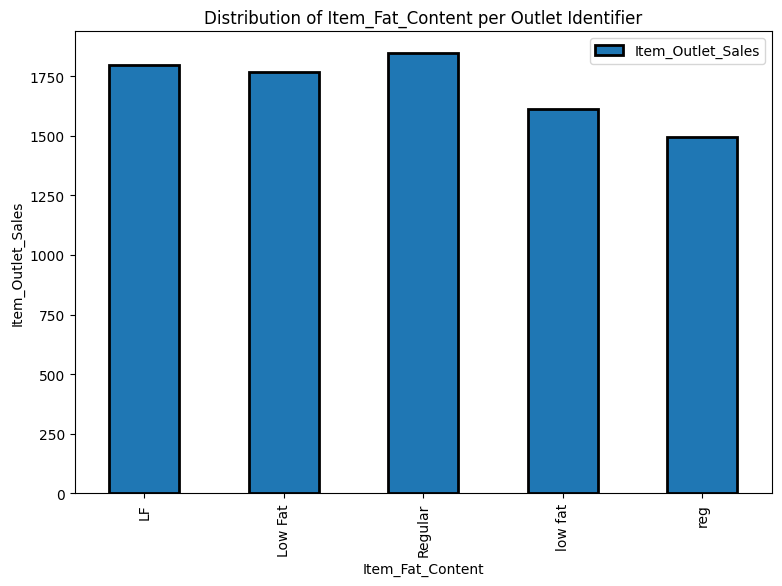

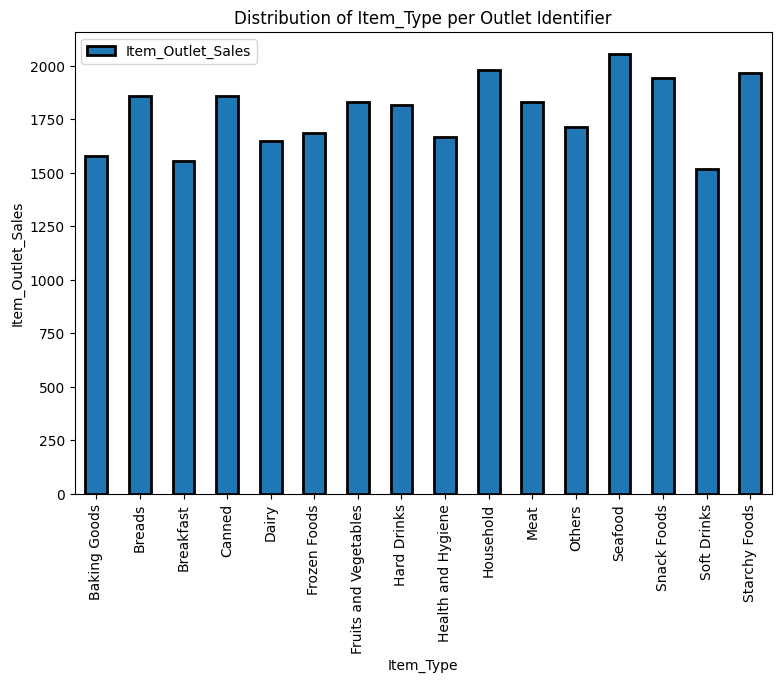

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

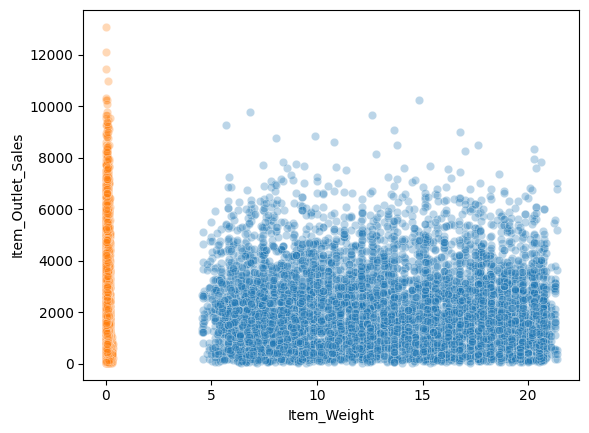

In [18]:
train_df.pivot_table(values='Outlet_Type', columns='Outlet_Location_Type', aggfunc=lambda x:x.mode())

relations('Outlet_Type')
relations('Outlet_Size')
relations('Item_Fat_Content')
relations('Item_Type')
sns.scatterplot(data=train_df, x='Item_Weight', y='Item_Outlet_Sales', alpha=0.3)

sns.scatterplot(data=train_df, x='Item_Visibility', y='Item_Outlet_Sales', alpha=0.3)

In [19]:
train_df['source']='train'
test_df['source']='test'
data = pd.concat([train_df,test_df], ignore_index = True)
print(train_df.shape, test_df.shape, data.shape)

data.info()


(8523, 13) (5681, 12) (14204, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4

In [20]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg', 'Regular')

for i in range(len(data)):
    if pd.isna(data.loc[i,'Outlet_Size']):
        if (data.loc[i,'Outlet_Type']=='Grocery Store') or (data.loc[i,'Outlet_Type']=='Supermarket Type1') :
            data.loc[i, 'Outlet_Size'] = 'Small'
        elif (data.loc[i,'Outlet_Type']=='Supermarket Type2') or (data.loc[i,'Outlet_Type']=='Supermarket Type3') :
            data.loc[i, 'Outlet_Size'] = 'Medium'
data['Item_Type_Category'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Category'] = data['Item_Type_Category'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data['Item_Type_Category'].value_counts()

data.loc[data['Item_Type_Category']=='Non-Consumable','Item_Fat_Content'] = "Non-Edible"
Item_Type_Mean = data.pivot_table(columns='Item_Type', values='Item_Weight', aggfunc=lambda x:x.mean())

In [21]:
for i in range(len(data)):
    if pd.isna(data.loc[i, 'Item_Weight']):
        item = data.loc[i, 'Item_Type']
        data.at[i, 'Item_Weight'] = Item_Type_Mean[item]
Item_Visibility_Mean = data[['Item_Type_Category', 'Item_Visibility']].groupby(['Item_Type_Category'], as_index=False).mean()
Item_Visibility_Mean.columns


Index(['Item_Type_Category', 'Item_Visibility'], dtype='object')

In [22]:
for i in range(len(data)):
    if data.loc[i, 'Item_Visibility']==0:
        cat =  data.loc[i, 'Item_Type_Category']
        m = Item_Visibility_Mean.loc[Item_Visibility_Mean['Item_Type_Category'] == cat]['Item_Visibility']
        data.at[i, 'Item_Visibility'] = m
data['Operation_Years'] = 2013-data['Outlet_Establishment_Year']
data=data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1)
lb=LabelEncoder()
data['Outlet']=lb.fit_transform(data['Outlet_Identifier'])
var=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Type_Category']
lb=LabelEncoder()
for item in var:
    data[item]=lb.fit_transform(data[item])
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Type_Category'])
data.head(10)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Operation_Years,Outlet,Item_Fat_Content_0,...,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_Category_0,Item_Type_Category_1,Item_Type_Category_2
0,FDA15,9.300000,0.016047,249.8092,OUT049,3735.1380,train,14,9,1,...,0,1,0,0,0,1,0,0,1,0
1,DRC01,5.920000,0.019278,48.2692,OUT018,443.4228,train,4,3,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.500000,0.016760,141.6180,OUT049,2097.2700,train,14,9,1,...,0,1,0,0,0,1,0,0,1,0
3,FDX07,19.200000,0.068098,182.0950,OUT010,732.3800,train,15,0,0,...,1,0,0,0,0,0,1,0,1,0
4,NCD19,8.930000,0.058354,53.8614,OUT013,994.7052,train,26,1,0,...,0,1,0,0,1,0,0,0,0,1
5,FDP36,10.395000,0.068098,51.4008,OUT018,556.6088,train,4,3,0,...,0,0,1,0,0,1,0,0,1,0
6,FDO10,13.650000,0.012741,57.6588,OUT013,343.5528,train,26,1,0,...,0,1,0,0,1,0,0,0,1,0
7,FDP10,12.865732,0.127470,107.7622,OUT027,4022.7636,train,28,5,1,...,0,0,0,1,0,1,0,0,1,0
8,FDH17,16.200000,0.016687,96.9726,OUT045,1076.5986,train,11,7,0,...,0,1,0,0,0,0,1,0,1,0
9,FDU28,19.200000,0.094450,187.8214,OUT017,4710.5350,train,6,2,0,...,0,1,0,0,0,0,1,0,1,0


In [24]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']
train = train.drop(['source'], axis=1)
test = test.drop(['source'], axis=1)
train.columns, test.columns, train.shape, test.shape


(Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Identifier', 'Item_Outlet_Sales', 'Operation_Years', 'Outlet',
        'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
        'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
        'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
        'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_Size_0', 'Outlet_Size_1',
        'Outlet_Size_2', 'Item_Type_Category_0', 'Item_Type_Category_1',
        'Item_Type_Category_2'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Identifier', 'Item_Outlet_Sales', 'Operation_Years', 'Outlet',
        'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
        'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
        'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
        'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_Size_0', 'Outlet_Size_1',
        'O

In [25]:
data_temp = train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
x_train = train.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1)
y_train = train['Item_Outlet_Sales']
x_test = test.drop(['Item_Outlet_Sales','Item_Identifier', 'Outlet_Identifier'], axis=1)


In [26]:
x_train.shape, y_train.shape, x_test.shape
((8523, 21), (8523,), (5681, 21))
x_train.columns, x_test.columns

(Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Operation_Years',
        'Outlet', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
        'Item_Fat_Content_2', 'Outlet_Location_Type_0',
        'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
        'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_Size_0',
        'Outlet_Size_1', 'Outlet_Size_2', 'Item_Type_Category_0',
        'Item_Type_Category_1', 'Item_Type_Category_2'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Operation_Years',
        'Outlet', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
        'Item_Fat_Content_2', 'Outlet_Location_Type_0',
        'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
        'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_Size_0',
        'Outlet_Size_1', 'Outlet_Size_2', 'Item_Type_Category_0',
        'Item_Type_Category_1', 'Item_Type_Category_2'],
       dtype='object'))

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [28]:
 #RNN model
model_RNN = Sequential()
model_RNN.add(LSTM(units=128, return_sequences=True, input_shape=(x_train_scaled.shape[1], 1)))
model_RNN.add(Dropout(0.2))
model_RNN.add(LSTM(units=64, return_sequences=True))
model_RNN.add(Dropout(0.2))
model_RNN.add(LSTM(units=32, return_sequences=False))
model_RNN.add(Dropout(0.2))
model_RNN.add(Dense(units=1))

model_RNN.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
#  Linear Regression model
model_LinReg = LinearRegression()


In [31]:
#ridge regression
model_RidgeReg = Ridge()

In [32]:
# Random Forest Regression model
model_RFReg = RandomForestRegressor(random_state=42)


In [34]:
# Train Models
x_train_scaled, x_val_scaled, y_train, y_val = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=42)

model_RNN.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=100, verbose=1)
model_LinReg.fit(x_train_scaled, y_train)
model_RidgeReg.fit(x_train_scaled, y_train)
model_RFReg.fit(x_train_scaled, y_train)


Epoch 1/100
214/214 [==============================] - 26s 68ms/step - loss: 7759132.0000 - val_loss: 7049030.5000
Epoch 2/100
214/214 [==============================] - 13s 62ms/step - loss: 7722974.0000 - val_loss: 7018926.5000
Epoch 3/100
214/214 [==============================] - 13s 62ms/step - loss: 7691707.0000 - val_loss: 6989593.0000
Epoch 4/100
214/214 [==============================] - 14s 65ms/step - loss: 7660724.5000 - val_loss: 6960576.0000
Epoch 5/100
214/214 [==============================] - 14s 64ms/step - loss: 7630670.0000 - val_loss: 6931815.0000
Epoch 6/100
214/214 [==============================] - 14s 64ms/step - loss: 7600912.5000 - val_loss: 6903397.0000
Epoch 7/100
214/214 [==============================] - 14s 64ms/step - loss: 7570920.5000 - val_loss: 6875097.5000
Epoch 8/100
214/214 [==============================] - 14s 66ms/step - loss: 7541018.5000 - val_loss: 6847032.0000
Epoch 9/100
214/214 [==============================] - 14s 65ms/step - loss: 751

RandomForestRegressor(random_state=42)

In [36]:
# Evaluate Models
score_RNN = model_RNN.evaluate(x_val_scaled, y_val)
score_LinReg = model_LinReg.score(x_val_scaled, y_val)
score_RidgeReg = model_RidgeReg.score(x_val_scaled, y_val)
score_RFReg = model_RFReg.score(x_val_scaled, y_val)

54/54 [==============================] - 2s 33ms/step - loss: 4698118.5000


In [37]:
print("\nModel Scores:\n")
print("RNN:", score_RNN)
print("Linear Regression:", score_LinReg)
print("Ridge Regression:", score_RidgeReg)
print("Random Forest Regression:", score_RFReg)


Model Scores:

RNN: 4698118.5
Linear Regression: 0.581053181380814
Ridge Regression: 0.580094674406747
Random Forest Regression: 0.5690877115194521
